In [1]:
import pandas as pd
import numpy as np


In [2]:
books_df = pd.read_csv('books_data/books.csv',encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
ratings_df = pd.read_csv('books_data/ratings.csv',encoding='ISO-8859-1', sep=';')
users_df = pd.read_csv('books_data/users.csv',encoding='ISO-8859-1', sep=';')

C:\Users\bwrig\AppData\Local\Temp\ipykernel_31532\2000191207.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('books_data/books.csv',encoding='ISO-8859-1', sep=';', on_bad_lines='skip')


In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [92]:
cluster_df = ratings_df.merge(users_df,on='User-ID').merge(books_df[['ISBN','Year-Of-Publication','Book-Author']],on='ISBN').dropna().reset_index().drop(columns=['index','Age','Location','User-ID'])

In [7]:
cluster_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Year-Of-Publication,Book-Author
0,276727,0446520802,0,"h, new south wales, australia",16.0,1996,Nicholas Sparks
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0,1999,Philip Prowse
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0,2001,Sue Leather
3,276733,2080674722,0,"paris, n/a, france",37.0,1998,Michel Houellebecq
4,276747,0060517794,9,"iowa city, iowa, usa",25.0,2003,Rebecca Wells


In [8]:
from sklearn.preprocessing import LabelEncoder


In [93]:
cat_cols = ['ISBN','Book-Author','Year-Of-Publication']

In [94]:
les = {}
cluster_df = cluster_df[~cluster_df['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])].reset_index().drop(columns=['index'])
cluster_df['Year-Of-Publication'] = cluster_df['Year-Of-Publication'].map(str)
df = pd.DataFrame(cluster_df)
for col in cat_cols:
    le = LabelEncoder()
    les[col] = le
    df[col] = le.fit_transform(cluster_df[col])


In [95]:
df.head()

,ISBN,Book-Rating,Year-Of-Publication,Book-Author
0,79827,0,87,62209
1,96101,3,90,66993
2,96130,6,92,78896
3,209259,0,89,59520
4,4715,9,94,69140


In [96]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [97]:
scaler = StandardScaler().fit(df)
s_df = scaler.transform(df)

In [98]:
from sklearn.cluster import KMeans
# load data
inertias = []
MAX_CLUSTERS = 34
K = range(11,MAX_CLUSTERS,5)

Cluster Centroids for 11 clusters:
[[ 1.07651505  1.33385348  0.19334217  0.87377139]
 [-0.02830513 -0.69670068 -0.02614689 -0.074022  ]
 [-0.71459399  1.33407299  0.09266532 -0.84454933]
 [-0.24117323 -0.7029332  -0.07763545  1.21698849]
 [-0.73260063 -0.7045693   0.03084012 -1.17481584]
 [ 0.37761401  0.07025401 -6.7192552  -0.09956669]
 [ 1.1344824   1.32721508  0.18817379 -0.87555317]
 [-1.11615775 -0.70254607  0.26090664  0.48621652]
 [ 1.30081666 -0.69602883  0.21352799  0.86740485]
 [-0.6702696   1.3247362   0.0944171   0.86500167]
 [ 1.13108457 -0.70080884  0.15939635 -0.9983206 ]]

Cluster Labels for 11 clusters:
[ 3  3  9 ... 10  2  2]
Cluster Centroids for 16 clusters:
[[-1.08168563e+00 -7.02874336e-01  3.20462123e-01  2.18513955e-01]
 [ 8.13592717e-02 -7.06063589e-01  2.58762180e-01  8.00370799e-02]
 [ 1.24664669e+00 -7.00718901e-01  1.91555045e-01  9.78924754e-01]
 [-4.80932644e-01  1.38193740e+00 -1.21820741e+00 -3.22950844e-01]
 [ 3.87411393e-01  6.80321026e-02 -6.771609

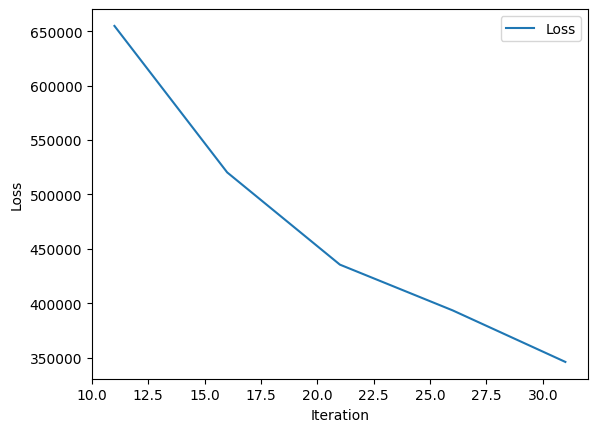

In [99]:


# try different numbers of clusters
for n_clusters in K:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(s_df)
    labels = kmeans.predict(s_df)
    print("Cluster Centroids for {} clusters:".format(n_clusters))
    print(kmeans.cluster_centers_)
    print("\nCluster Labels for {} clusters:".format(n_clusters))
    print(labels)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(K,inertias, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [111]:
N_CLUSTERS = 5

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(s_df)
labels = kmeans.predict(s_df)

In [112]:
cluster_df['Label'] = labels
df['Label'] = labels


In [113]:
cluster_df.head()

,ISBN,Book-Rating,Year-Of-Publication,Book-Author,Label
0,0446520802,0,1996,Nicholas Sparks,1
1,052165615X,3,1999,Philip Prowse,1
2,0521795028,6,2001,Sue Leather,2
3,2080674722,0,1998,Michel Houellebecq,3
4,0060517794,9,2003,Rebecca Wells,2


In [114]:
import xgboost as xgb
import sklearn.metrics as metrics


In [115]:
x_cols = ['ISBN','Label']
y_cols = ['Book-Rating']
msk = np.random.rand(len(df)) < .95

X_train = df[msk][x_cols]
y_train = df[msk][y_cols]

X_test = df[~msk][x_cols]
y_test = df[~msk][y_cols]


In [116]:
X_train.head()

,ISBN,Label
0,79827,1
1,96101,1
2,96130,2
4,4715,2
5,86403,1


In [117]:
def train_test_xgb(X_train,y_train,X_test,y_test):
    xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42,n_estimators=10,device="gpu")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    dist = metrics.mean_absolute_error(y_test,y_pred)
    xgb_model.save_model('xgboost_model'+str(acc)+'.json')
    print('XGB Accuracy: %.9f%%' % (acc*100))
    print('Mean absoulte error: ', dist)
    return acc

In [118]:
train_test_xgb(X_train,y_train,X_test,y_test)

XGB Accuracy: 73.039694052%
Mean absoulte error:  0.5661347751549519


0.7303969405248583

In [69]:
cluster_df.groupby('User-ID').count().reset_index().sort_values(by='ISBN')['ISBN'].quantile(.8)

7.0

In [24]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [108]:
books_df['Label'] = 4

In [109]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Label
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,4
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,4
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,4
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,4
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,4
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,4
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,4
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,4
